In [2]:
import pandas as pd

# Load trader data
trader_df = pd.read_csv(r"C:\Users\yoges\Downloads\historical_data.csv")
# Load Fear & Greed data
fear_greed_df = pd.read_csv(r"C:\Users\yoges\Downloads\fear_greed_index.csv")
print(trader_df.head())
print(fear_greed_df.head())
# Print
print(trader_df.info())
print(trader_df.head())

                                      Account  Coin  Execution Price  \
0  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9769   
1  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9800   
2  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9855   
3  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9874   
4  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9894   

   Size Tokens  Size USD Side     Timestamp IST  Start Position Direction  \
0       986.87   7872.16  BUY  02-12-2024 22:50        0.000000       Buy   
1        16.00    127.68  BUY  02-12-2024 22:50      986.524596       Buy   
2       144.09   1150.63  BUY  02-12-2024 22:50     1002.518996       Buy   
3       142.98   1142.04  BUY  02-12-2024 22:50     1146.558564       Buy   
4         8.73     69.75  BUY  02-12-2024 22:50     1289.488521       Buy   

   Closed PnL                                   Transaction Hash     Order ID  \
0         0.0  0xec0945

In [3]:
# Step 1: Parse date
trader_df['date'] = pd.to_datetime(trader_df['Timestamp IST'], format="%d-%m-%Y %H:%M").dt.date

# Step 2: Ensure fear_greed_df['date'] is datetime.date type
fear_greed_df['date'] = pd.to_datetime(fear_greed_df['date']).dt.date

# Step 3: Merge on date
merged_df = pd.merge(trader_df, fear_greed_df, on='date', how='inner')

# Step 4: Preview
print(merged_df[['date', 'Closed PnL', 'value', 'classification']].head())
print("Shape after merge:", merged_df.shape)


         date  Closed PnL  value classification
0  2024-12-02         0.0     80  Extreme Greed
1  2024-12-02         0.0     80  Extreme Greed
2  2024-12-02         0.0     80  Extreme Greed
3  2024-12-02         0.0     80  Extreme Greed
4  2024-12-02         0.0     80  Extreme Greed
Shape after merge: (211218, 20)


In [4]:
# Group by sentiment classification and get average Closed PnL
sentiment_performance = merged_df.groupby('classification')['Closed PnL'].agg(['mean', 'median', 'count', 'std']).reset_index()
print(sentiment_performance)


  classification       mean  median  count          std
0   Extreme Fear  34.537862     0.0  21400  1136.056091
1  Extreme Greed  67.892861     0.0  39992   766.828294
2           Fear  54.290400     0.0  61837   935.355438
3          Greed  42.743559     0.0  50303  1116.028390
4        Neutral  34.307718     0.0  37686   517.122220


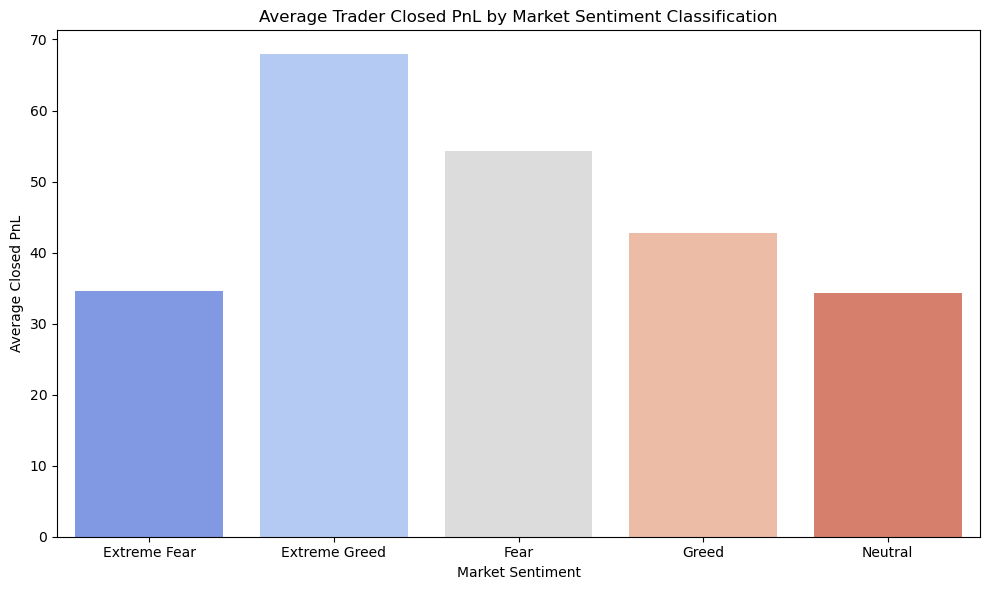

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Ensure merged_df exists
# Example of creating sentiment_performance
sentiment_performance = merged_df.groupby('classification')['Closed PnL'].agg(['mean', 'count']).reset_index()

# Now plot
plt.figure(figsize=(10, 6))
sns.barplot(
    data=sentiment_performance,
    x='classification',
    y='mean',
    hue='classification',
    palette='coolwarm',
    legend=False
)
plt.title('Average Trader Closed PnL by Market Sentiment Classification')
plt.xticks(rotation=0)
plt.ylabel('Average Closed PnL')
plt.xlabel('Market Sentiment')
plt.tight_layout()
plt.show()


In [6]:
corr = merged_df['value'].corr(merged_df['Closed PnL'])
print(f"Correlation between Fear & Greed value and Closed PnL: {corr:.3f}")


Correlation between Fear & Greed value and Closed PnL: 0.008


Side              BUY   SELL
classification              
Extreme Fear    10935  10465
Extreme Greed   17940  22052
Fear            30270  31567
Greed           24576  25727
Neutral         18969  18717
Side                  BUY        SELL
classification                       
Extreme Fear    34.114627   34.980106
Extreme Greed   10.498927  114.584643
Fear            63.927104   45.049641
Greed           25.002302   59.691091
Neutral         29.227429   39.456408


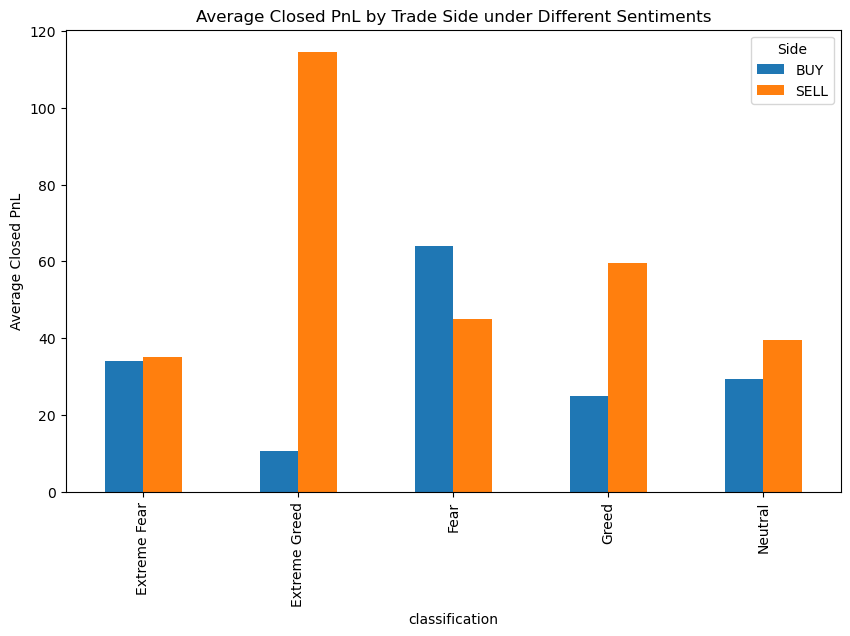

In [7]:
# Count trades by Side and Sentiment classification
trade_counts = merged_df.groupby(['classification', 'Side']).size().unstack()

# Average Closed PnL by Side and Sentiment
avg_pnl = merged_df.groupby(['classification', 'Side'])['Closed PnL'].mean().unstack()

print(trade_counts)
print(avg_pnl)

# Visualization example: Bar plot of average Closed PnL by Side under each sentiment
import matplotlib.pyplot as plt
avg_pnl.plot(kind='bar', figsize=(10,6))
plt.title('Average Closed PnL by Trade Side under Different Sentiments')
plt.ylabel('Average Closed PnL')
plt.show()


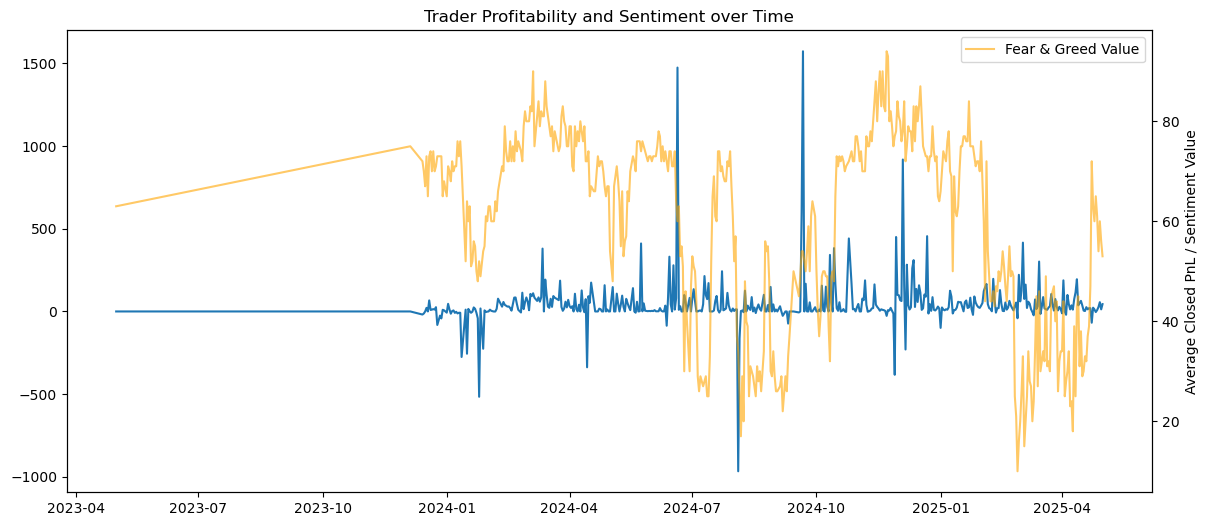

In [8]:
# Convert 'date' to datetime if not already
merged_df['date'] = pd.to_datetime(merged_df['date'])

# Calculate daily average Closed PnL and sentiment value
daily_stats = merged_df.groupby('date').agg({
    'Closed PnL': 'mean',
    'value': 'first',  # sentiment value per day (same for all rows with that date)
    'classification': 'first'
}).reset_index()

plt.figure(figsize=(14,6))

# Plot Closed PnL over time
plt.plot(daily_stats['date'], daily_stats['Closed PnL'], label='Average Closed PnL')

# Plot sentiment value on secondary axis
plt.twinx()
plt.plot(daily_stats['date'], daily_stats['value'], color='orange', alpha=0.6, label='Fear & Greed Value')

plt.title('Trader Profitability and Sentiment over Time')
plt.xlabel('Date')
plt.ylabel('Average Closed PnL / Sentiment Value')
plt.legend()
plt.show()